In [1]:
import matplotlib.pyplot as plt
import numpy as np

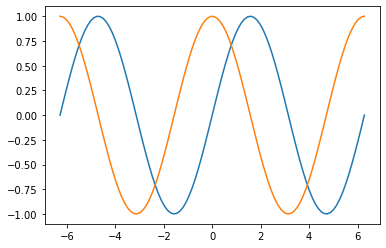

In [2]:
# Sine and Cosine graphs
x_s = np.linspace(-2 * np.pi, 2 * np.pi, num=100)
y_s = np.sin(x_s)
plt.plot(x_s, y_s)

x_c = np.linspace(-2 * np.pi, 2 * np.pi, num=100)
y_c = np.cos(x_c)
plt.plot(x_c, y_c)

plt.show()

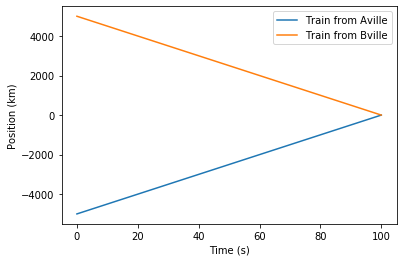

In [3]:
# Problem 8, part b
v = 50 # m/s
x0_a = -5000 # m
x0_b = 5000 # m

# displacement and time arrays for 
xlist_a = np.array([]) # train leaving Aville
xlist_b = np.array([]) # train leaving Bville
t = np.array([0]) # time

# initialize current positions 
x_a = x0_a
x_b = x0_b
# iterate until trains crash
while not (x_a >= x_b):
    x_a = v * t[-1] + x0_a # position of train A
    x_b = -v * t[-1] + x0_b # position of train B
    
    # add to list for plotting
    xlist_a = np.append(xlist_a, [x_a]) 
    xlist_b = np.append(xlist_b, [x_b]) 
    t = np.append(t,[t[-1] + 1])
    
# plot
plt.plot(t[:-1], xlist_a)
plt.plot(t[:-1], xlist_b)
plt.xlabel('Time (s)')
plt.ylabel('Position (km)')
plt.legend(['Train from Aville', 'Train from Bville'])

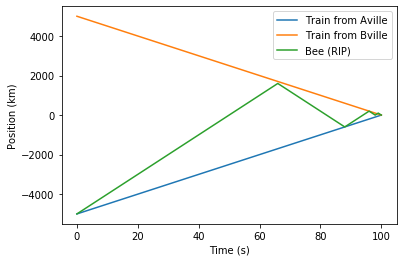

In [4]:
# Problem 8, part c
v = 50 # m/s
u = 100 # m/s
x0_a = -5000 # m
x0_b = 5000 # m
x0_bee = x0_a

# displacement and time arrays for 
xlist_a = np.array([]) # train leaving Aville
xlist_b = np.array([]) # train leaving Bville
xlist_bee = np.array([]) # bee
t = np.array([0]) # time
# to keep track of time when new 
# segment of bee's journey starts
t0_bee = 0 

# initialize current positions
x_a = x0_a
x_b = x0_b
x_bee = x0_bee

# iterate until trains crash
while not (x_a >= x_b):
    x_a = v * t[-1] + x0_a
    x_b = -v * t[-1] + x0_b
    x_bee = u * (t[-1] - t0_bee) + x0_bee
    
    # if bee will "crash" into a train
    # on the next iteration, then
    # reverse the bee's direction 
    if ((x_bee + u) >= x_b and u > 0):
        u = -u
        x0_bee = x_bee
        t0_bee = t[-1]
    if ((x_bee + u) <= x_a and u < 0):
        u = -u
        x0_bee = x_bee
        t0_bee = t[-1]
    
    # add to list for plotting
    xlist_a = np.append(xlist_a, [x_a])
    xlist_b = np.append(xlist_b, [x_b])
    xlist_bee = np.append(xlist_bee, [x_bee])
    t = np.append(t,[t[-1] + 1])
    
# plot
plt.plot(t[:-1], xlist_a)
plt.plot(t[:-1], xlist_b)
plt.plot(t[:-1], xlist_bee)
plt.xlabel('Time (s)')
plt.ylabel('Position (km)')
plt.legend(['Train from Aville', 'Train from Bville', 'Bee (RIP)'])